In [1]:
import os
import pandas as pd
import numpy as np
import librosa
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

In [2]:
audio_dataset_path = '/home/trupti/Desktop/Zense_Proj_ML/archive/Data/genres_original'
metadata = pd.read_csv(r'/home/trupti/Desktop/Zense_Proj_ML/archive/Data/features_30_sec.csv')

In [3]:
def feature_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type = 'kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0)
    return mfccs_scaled_features

In [4]:
extracted_features = []
for index_num, row in tqdm(metadata.iterrows()):
    try:
        final_class_labels = row["label"]
        file_name = os.path.join(os.path.abspath(audio_dataset_path), final_class_labels + '/', str(row["filename"]))
        data = feature_extractor(file_name)
        extracted_features.append([data, final_class_labels])
    except Exception as e:
        print(f"Error: {e}")
        continue

553it [00:16, 35.23it/s]/tmp/ipykernel_8883/1946415227.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_name, res_type = 'kaiser_fast')
/home/trupti/Desktop/anaconda3/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
561it [00:16, 31.05it/s]

Error: 


1000it [00:29, 33.85it/s]


In [5]:
extracted_features_df = pd.DataFrame(extracted_features, columns = ['feature', 'class'])

In [6]:
extracted_features_df['class'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
metal        100
pop          100
reggae       100
rock         100
jazz          99
Name: class, dtype: int64

In [7]:
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the split datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (799, 40)
Shape of X_test: (200, 40)
Shape of y_train: (799,)
Shape of y_test: (200,)


In [9]:
svm_model = SVC()

In [10]:
svm_model.fit(X_train, y_train)

SVC()

In [11]:
y_pred = svm_model.predict(X_test)

In [12]:
y_pred

array(['reggae', 'pop', 'pop', 'pop', 'reggae', 'reggae', 'reggae',
       'jazz', 'reggae', 'metal', 'pop', 'metal', 'country', 'hiphop',
       'pop', 'rock', 'reggae', 'hiphop', 'disco', 'pop', 'jazz', 'metal',
       'metal', 'pop', 'rock', 'metal', 'classical', 'country', 'reggae',
       'pop', 'jazz', 'pop', 'metal', 'jazz', 'metal', 'metal',
       'classical', 'classical', 'metal', 'blues', 'pop', 'blues', 'pop',
       'metal', 'classical', 'pop', 'rock', 'pop', 'metal', 'hiphop',
       'metal', 'classical', 'reggae', 'jazz', 'blues', 'reggae', 'jazz',
       'jazz', 'jazz', 'pop', 'metal', 'metal', 'hiphop', 'classical',
       'pop', 'disco', 'jazz', 'classical', 'blues', 'jazz', 'jazz',
       'classical', 'metal', 'classical', 'blues', 'jazz', 'jazz', 'pop',
       'jazz', 'rock', 'rock', 'reggae', 'rock', 'hiphop', 'metal', 'pop',
       'metal', 'blues', 'pop', 'hiphop', 'hiphop', 'hiphop', 'blues',
       'jazz', 'pop', 'country', 'disco', 'reggae', 'metal', 'hiphop',

In [13]:
accuracy = accuracy_score(y_test, y_pred)

In [14]:
print("Accuracy of testing dataset:", accuracy)

Accuracy of testing dataset: 0.455


In [15]:
y_train_pred = svm_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)

In [16]:
print("Accuracy of training dataset : ", accuracy_train)

Accuracy of training dataset :  0.47058823529411764


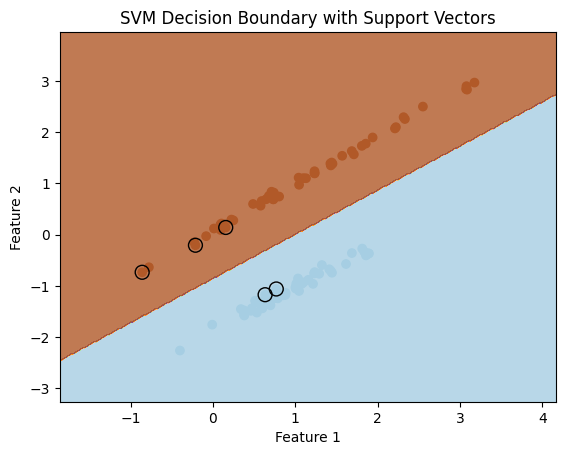

In [17]:
import matplotlib.pyplot as plt

# Create synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                            n_clusters_per_class=1, random_state=42)

# Fit SVM model
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X, y)

# Create a meshgrid of points for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict for each point in the meshgrid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Highlight support vectors
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

plt.title('SVM Decision Boundary with Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()